# **Mini Project 2 – Students' Grade Prediction by Ashish Dahal**
In this project we will be using random forest classifier and naive bayes classifier to predict students’ final grade in an online course using data from an online learning management system called Moodle.

## **Part 1 - Data Processing**

Importing Essential Libraries and setting up configurations

In [315]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
%matplotlib inline

Looking at the general overview of the data and performing basic exploratory data analysis

In [316]:
# Importing the data from google drive

url='https://drive.google.com/file/d/11rJEMdgF1CUFXXIhkBj95R-3Ch2FxVIj/view?usp=sharing'
id = url.split('/')[-2]
url1='https://drive.google.com/uc?id=' + id
df = pd.read_csv(url1)

In [317]:
# Getting a general feel about the data
print("Rows: ",df.shape[0], "\nColumns: ", df.shape[1])
print("Column Names:", list(df.columns))


Rows:  107 
Columns:  48
Column Names: ['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade']


**Here is the data dictionary:**


---



* **Status0:** course / lectures / content related (Course module viewed, Course viewed, Course activity completion updated, Course module instance list viewed, Content page viewed, Lesson started, Lesson resumed, Lesson restarted, Lesson ended)

* **Status1:** assignment related (Quiz attempt reviewed, Quiz attempt submitted, Quiz attempt summary viewed, Quiz attempt viewed, Quiz attempt started, Question answered, Question viewed, Submission re-assessed, Submission assessed, Submission updated, Submission created, Submission viewed)

* **Status2:** grade related (Grade user report viewed, Grade overview report viewed, User graded, Grade deleted, User profile viewed, Recent activity viewed, User report viewed, Course user report viewed, Outline report viewed)

* **Status3:** forum related (Post updated, Post created, Discussion created, Some content has been posted, Discussion viewed)

* **9 grades** (Week2_Quiz1, Week3_MP1, ... Week7_MP3)

* **36 logs** (Week1_Stat0, Week1_Stat1, Week1_Stat2, Week1_Stat3, .. Week9_Stat0, Week9_Stat1, Week9_Stat2, Week9_Stat3)


---



In [318]:
# Looking at 10 random data samples
df.sample(10, random_state=5)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
85,ML-2020-50,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,11,0,0
10,ML-2020-16,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,ML-2020-30,3.33,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,3.33,3,0,0,0,28,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,ML-2020-34,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,11,0,1,0,6,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,ML-2020-85,4.17,14.0,5.0,20.00,5.0,27.05,5.0,3.83,5.0,89.05,14,0,0,0,28,14,1,0,43,4,0,0,86,31,1,2,56,9,0,0,60,23,2,1,31,3,0,3,19,4,0,0,17,5,1,0,4
54,ML-2020-75,4.17,11.0,5.0,13.91,5.0,14.72,5.0,4.67,4.0,67.47,6,0,0,0,16,10,1,5,55,8,0,0,58,15,1,4,87,8,0,0,81,13,1,1,21,8,0,3,8,1,0,2,17,2,2,0,2
42,ML-2020-56,4.17,13.0,5.0,19.13,5.0,11.14,5.0,5.00,5.0,72.44,13,0,1,0,25,28,1,20,31,4,0,0,97,18,2,9,41,5,0,0,89,15,1,5,30,7,3,9,4,1,0,0,7,1,1,0,3
56,ML-2020-77,1.67,13.0,5.0,6.96,5.0,21.48,5.0,4.05,4.5,66.66,0,0,0,0,13,10,1,0,15,0,0,0,29,4,0,2,37,20,2,0,11,14,1,0,57,12,2,0,14,5,0,0,4,2,0,0,2
28,ML-2020-40,3.33,15.0,5.0,0.00,5.0,0.00,0.0,5.00,5.0,38.33,0,0,0,0,8,10,1,0,47,4,0,7,22,28,2,0,24,8,0,2,21,18,1,0,6,0,2,0,9,2,3,2,2,0,1,0,0
66,ML-2020-90,1.67,12.0,5.0,16.09,5.0,32.61,5.0,5.00,5.0,87.37,0,0,0,0,24,10,1,0,59,4,0,0,79,42,3,0,45,4,0,0,96,30,2,0,18,4,0,0,5,2,0,0,0,0,0,0,4


In [319]:
# Checking if there are any null values
df.isnull().sum().any()

False

In [320]:
# Getting more info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [321]:
# Looking at some descriptive statistics about the data
df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,6.785047,0.0,0.598131,0.224299,16.88785,13.299065,1.252336,1.841121,31.728972,2.822430,0.953271,1.130841,41.915888,16.046729,1.943925,1.009346,26.074766,5.009346,1.588785,0.663551,37.607477,14.271028,2.775701,0.411215,16.355140,3.242991,1.813084,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,7.157300,0.0,1.966031,0.730836,16.30796,11.308049,1.505295,4.202761,28.686191,3.206165,2.689544,2.269919,47.164330,17.040675,2.790928,2.806648,31.159269,6.568213,3.954823,1.822003,47.851334,14.009815,7.206271,1.220526,22.242341,5.001587,4.895379,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,6.50000,10.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,4.000000,0.0,0.000000,0.000000,15.00000,11.000000,1.000000,0.000000,27.000000,4.000000,0.000000,0.000000,27.000000,15.000000,1.000000,0.000000,20.000000,4.000000,0.000000,0.000000,18.000000,15.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,12.000000,0.0,0.000000,0.000000,24.00000,19.000000,1.000000,2.000000,47.500000,4.000000,0.000000,1.000000,74.500000,27.500000,2.000000,1.000000,40.500000,6.500000,1.000000,0.000000,65.000000,25.000000,2.000000,0.000000,27.000000,5.000000,1.000000,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,27.000000,0.0,11.000000,6.000000,104.00000,57.000000,10.000000,25.000000,108.000000,15.000000,15.000000,14.000000,240.000000,87.000000,13.000000,24.000000,185.000000,39.000000,23.000000,11.000000,208.000000,51.000000,45.000000,7.000000,145.000000,24.000000,

Let's check if there are any columns with single unique values that don't add anything meaningful to our ML model

In [322]:
df.nunique()

ID             107
Week2_Quiz1      7
Week3_MP1        9
Week3_PR1        2
Week5_MP2       25
Week5_PR2        5
Week7_MP3       35
Week7_PR3        3
Week4_Quiz2     23
Week6_Quiz3      7
Week8_Total     70
Week1_Stat0     25
Week1_Stat1      1
Week1_Stat2      6
Week1_Stat3      4
Week2_Stat0     37
Week2_Stat1     25
Week2_Stat2      8
Week2_Stat3     12
Week3_Stat0     59
Week3_Stat1      8
Week3_Stat2      9
Week3_Stat3      9
Week4_Stat0     61
Week4_Stat1     37
Week4_Stat2     11
Week4_Stat3      8
Week5_Stat0     48
Week5_Stat1     20
Week5_Stat2     12
Week5_Stat3      8
Week6_Stat0     49
Week6_Stat1     32
Week6_Stat2     13
Week6_Stat3      7
Week7_Stat0     42
Week7_Stat1     18
Week7_Stat2     11
Week7_Stat3     10
Week8_Stat0     32
Week8_Stat1     16
Week8_Stat2      9
Week8_Stat3      6
Week9_Stat0     26
Week9_Stat1     11
Week9_Stat2     11
Week9_Stat3      2
Grade            5
dtype: int64

Column 'Week1_Stat1' has only 1 unique value

In [323]:
df['Week1_Stat1'][0]

0

Dropping the column 'Week1_Stat1' as it has only 1 unique value i.e 0:

In [324]:
clean_df = df.drop('Week1_Stat1', axis=1)

Also dropping the 'Week8_total' as it is bassically the final grade out of 100 so we should not include it to predict the grade itself:

In [325]:
clean_df.drop('Week8_Total', axis=1, inplace=True)

Looking at the correlation of grades to other metrics:



In [326]:
# Bringing grades to the front
df1 =  clean_df.pop('Grade')
clean_df.insert(0,'Grade', df1 )

clean_df.corr().style.background_gradient()

,Grade,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
Grade,1.000000,0.689783,0.901788,0.887352,0.953488,0.907837,0.968130,0.865616,0.810920,0.849920,0.256311,-0.129440,0.072546,0.293296,0.406120,0.292262,0.202950,0.643789,0.596824,-0.162950,0.227106,0.625359,0.662946,0.171987,0.278034,0.590146,0.484030,0.073326,0.264079,0.635807,0.771988,0.288761,0.270239,0.377195,0.424807,0.087466,0.439733,0.450807,0.584425,0.009186,0.234907,0.545532,0.496753,0.147822,0.094227
Week2_Quiz1,0.689783,1.000000,0.739992,0.723109,0.677371,0.710990,0.635804,0.622655,0.746331,0.695119,0.300366,-0.117627,0.181211,0.280832,0.556281,0.310806,0.110425,0.414033,0.492643,-0.214260,0.118382,0.473524,0.531564,0.083647,0.143124,0.376278,0.214373,0.048646,0.077445,0.484821,0.600026,0.255848,0.234891,0.235727,0.245937,0.070341,0.391529,0.390792,0.429210,0.018500,0.235174,0.472536,0.436145,0.213437,0.045046
Week3_MP1,0.901788,0.739992,1.000000,0.962502,0.905769,0.964849,0.881352,0.834397,0.879998,0.912700,0.207722,-0.138389,0.045340,0.263653,0.438057,0.300951,0.187910,0.620521,0.681233,-0.162276,0.269732,0.644619,0.673207,0.131970,0.251183,0.590277,0.497733,0.065954,0.273885,0.637614,0.800424,0.269825,0.301914,0.414058,0.424435,0.108034,0.455459,0.477576,0.541086,0.037039,0.268698,0.549969,0.518334,0.154754,0.099824
Week3_PR1,0.887352,0.723109,0.962502,1.000000,0.890706,0.942896,0.868638,0.830599,0.904170,0.906560,0.190054,-0.133647,0.039920,0.242157,0.393277,0.299888,0.195973,0.578590,0.682480,-0.163175,0.159611,0.641850,0.701907,0.151609,0.252379,0.493960,0.410296,0.041491,0.199237,0.631253,0.781563,0.268998,0.299595,0.413137,0.432823,0.105181,0.456261,0.403779,0.500834,0.022088,0.185638,0.561184,0.489662,0.170683,0.085965
Week5_MP2,0.953488,0.677371,0.905769,0.890706,1.000000,0.932880,0.904458,0.874247,0.808479,0.847296,0.295289,-0.119718,0.071729,0.289105,0.414010,0.280988,0.224640,0.635392,0.628943,-0.166813,0.220262,0.636984,0.667066,0.150705,0.275934,0.614323,0.488617,0.094845,0.252849,0.658339,0.774109,0.289132,0.319781,0.406929,0.458277,0.114978,0.474257,0.509593,0.559422,0.032855,0.204243,0.581338,0.455110,0.149925,0.097039
Week5_PR2,0.907837,0.710990,0.964849,0.942896,0.932880,1.000000,0.897020,0.854744,0.863713,0.887432,0.220964,-0.139694,0.034469,0.259856,0.419411,0.298030,0.188965,0.594125,0.643458,-0.198660,0.226389,0.631029,0.676029,0.132491,0.246786,0.618547,0.518354,0.073161,0.264988,0.627247,0.777716,0.260625,0.294667,0.418340,0.439521,0.102907,0.447560,0.520521,0.554598,0.037541,0.245074,0.549798,0.522180,0.165532,0.084738
Week7_MP3,0.968130,0.635804,0.881352,0.868638,0.904458,0.897020,1.000000,0.807097,0.781677,0.814492,0.191758,-0.151862,0.055818,0.244171,0.343851,0.247301,0.146679,0.606935,0.575458,-0.167249,0.215084,0.586690,0.611624,0.146807,0.248646,0.607276,0.534183,0.026019,0.267622,0.565631,0.724194,0.225891,0.179903,0.352334,0.408705,0.047093,0.355063,0.429833,0.578306,-0.027907,0.225299,0.480964,0.503761,0.099568,0.053977
Week7_PR3,0.865616,0.622655,0.834397,0.830599,0.874247,0.854744,0.807097,1.000000,0.785238,0.814822,0.235127,-0.113241,0.054566,0.272002,0.365791,0.239514,0.136307,0.616802,0.631078,-0.166329,0.169032,0.609215,0.598036,0.089167,0.248379,0.520563,0.446428,0.061028,0.299079,0.599348,0.726117,0.261663,0.349259,0.424917,0.455037,0.087097,0.480963,0.455430,0.498989,0.017352,0.274266,0.570810,0.569017,0.190900,0.104765
Week4_Quiz2,0.810920,0.746331,0.879998,0.904170,0.808479,0.863713,0.781677,0.785238,1.000000,0.912396,0.128572,-0.132572,-0.016076,0.191831,0.

**Analysis and Hypotheses:**
* As the correlation matrix shows, Quiz, MP and PR of all weeks are highly correlated with the grades. These will be the most important features to predict the grade of the students.

* Also, as it seems, Status0 and Status1 are somewhat correlated with the grades and Status2 and Status3 are slightly correlated with the grades. Although these features might be somewhat usable, they are less important.



---



---


Combining similar features into distinct 'buckets' as a cummulative sum:


1.   **Quiz**: Quiz of week 2, 4, and 6
2.   **MP**: MP of week 3, 5, and 7
3.   **PR**: PR of week 3, 5, and 7
4.   **Stat0**: Stat0 of week 1 to 9
5.   **Stat1**: Stat1 of week 1 to 9
5.   **Stat2**: Stat2 of week 1 to 9
5.   **Stat3**: Stat3 of week 1 to 9




In [327]:
# Initializing buckets and DataFrame
buckets = ['Quiz','MP','PR','Stat0','Stat1','Stat2','Stat3','Grade']
combined_df = pd.DataFrame(np.zeros((len(clean_df.index), len(buckets))),columns=buckets)
combined_df['Grade'] = clean_df['Grade']

# Combining
for column in clean_df:
  if 'quiz' in column.lower():
    combined_df['Quiz'] += clean_df[column]
  elif 'mp' in column.lower():
    combined_df['MP'] += clean_df[column]
  elif 'pr' in column.lower():
    combined_df['PR'] += clean_df[column]
  elif 'stat0' in column.lower():
    combined_df['Stat0'] += clean_df[column]
  elif 'stat1' in column.lower():
    combined_df['Stat1'] += clean_df[column]
  elif 'stat2' in column.lower():
    combined_df['Stat2'] += clean_df[column]
  elif 'stat3' in column.lower():
    combined_df['Stat3'] += clean_df[column]
    
# Resulting dataset
combined_df.sample(10, random_state=5)

,Quiz,MP,PR,Stat0,Stat1,Stat2,Stat3,Grade
85,0.00,0.00,0.0,2.0,0.0,11.0,0.0,0
10,0.00,0.00,0.0,10.0,0.0,1.0,0.0,0
20,3.33,0.00,0.0,50.0,10.0,1.0,1.0,0
23,0.00,0.00,0.0,24.0,0.0,1.0,0.0,0
63,13.00,61.05,15.0,354.0,93.0,5.0,6.0,4
54,12.84,39.63,15.0,349.0,65.0,5.0,15.0,2
42,14.17,43.27,15.0,337.0,79.0,9.0,43.0,3
56,10.22,41.44,15.0,180.0,67.0,6.0,2.0,2
28,13.33,15.00,10.0,139.0,70.0,10.0,11.0,0
66,11.67,60.70,15.0,326.0,96.0,6.0,0.0,4


In [328]:
combined_df.corr().style.background_gradient()

,Quiz,MP,PR,Stat0,Stat1,Stat2,Stat3,Grade
Quiz,1.000000,0.872801,0.909626,0.660283,0.817165,0.163991,0.395407,0.850059
MP,0.872801,1.000000,0.955424,0.729586,0.814782,0.146983,0.418371,0.981128
PR,0.909626,0.955424,1.000000,0.732918,0.825519,0.165996,0.425683,0.925995
Stat0,0.660283,0.729586,0.732918,1.000000,0.818152,0.428821,0.622675,0.720340
Stat1,0.817165,0.814782,0.825519,0.818152,1.000000,0.332783,0.537187,0.801245
Stat2,0.163991,0.146983,0.165996,0.428821,0.332783,1.000000,0.164025,0.169317
Stat3,0.395407,0.418371,0.425683,0.622675,0.537187,0.164025,1.000000,0.430672
Grade,0.850059,0.981128,0.925995,0.720340,0.801245,0.169317,0.430672,1.000000


We get a similar correlation matric among the features and the target value as we expected so is safe to assume that the aggregation didn't affect the relationships and we can proceed to next steps.

Also, removing the 'Stat2' column as it seems it doesn't affect the grade that much and won't be helpful in prediction:

In [329]:
combined_df.drop('Stat2', axis=1)

,Quiz,MP,PR,Stat0,Stat1,Stat3,Grade
0,15.00,52.97,15.00,118.0,119.0,4.0,4
1,12.33,55.10,15.00,465.0,85.0,37.0,4
2,11.67,55.27,12.50,169.0,65.0,9.0,3
3,10.63,55.02,15.00,553.0,74.0,15.0,3
4,9.67,43.08,14.93,149.0,62.0,17.0,2
...,...,...,...,...,...,...,...
102,0.00,0.00,0.00,95.0,54.0,4.0,0
103,0.00,0.00,0.00,52.0,13.0,0.0,0
104,0.00,0.00,0.00,9.0,0.0,0.0,0
105,0.00,0.00,0.00,21.0,0.0,5.0,0


Looking at the distribution of grades:

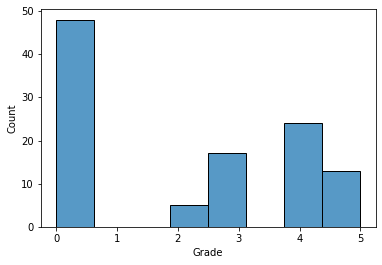

In [330]:
sns.histplot(data=combined_df['Grade']);

There is an imbalance in distribution of grades. We need to stratify our train and test dataset to address this.

## **Part 2 - Training and Test Dataset**
Spilitting the data set into training and test dataset (70 to 30 ratio)

In [331]:
# feature values (all the columns except last one)
X = combined_df.iloc[:, :-1]

# target value (last column)
y = combined_df.iloc[:, -1]

# performing the train/test split where test set size is 30% of the dataset
# Stratifying the datasets to preserve the distribution of grades (controlling class imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=25)

## **Part 3 - Training the Models**

Training the Random Forest Classifier:

In [332]:
# Creating a Random Forest Classifier with Hyperparameters
rf_clf = RandomForestClassifier(random_state=5, n_estimators=25, max_features=6, max_leaf_nodes=6)

# Training the model
rf_clf.fit(X_train, y_train)

# Making predictions
rf_y_pred = rf_clf.predict(X_test)
pd.DataFrame([y_test.to_list(), rf_y_pred.tolist()], index=['Actual Grades', 'Predicted Grades'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
Actual Grades,0,4,3,0,3,0,2,0,0,3,3,3,0,4,0,0,0,4,0,5,0,4,5,4,4,0,4,0,2,0,5,0,5
Predicted Grades,0,4,3,0,3,0,2,0,0,3,3,3,0,4,0,0,0,3,0,5,0,4,5,4,4,0,4,0,2,0,5,0,4


In [345]:
# Calculating Accurancy
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
print("Accuracy of RandomForestClassifier: ", f'{rf_accuracy*100:.2f}','%')
pd.crosstab(y_test, rf_y_pred, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Accuracy of GaussianNB:  93.94 %


Predicted Grades,0,2,3,4,5
Actual Grades,,,,,
0,15,0,0,0,0
2,0,2,0,0,0
3,0,0,5,0,0
4,0,0,1,6,0
5,0,0,0,1,3


Training the Gaussian Naive Bayes Classifier:

In [333]:
# Creating a Gaussian Classifier
gnb_clf = GaussianNB()

# Training the model
gnb_clf.fit(X_train, y_train)

# Making predictions
gnb_y_pred = gnb_clf.predict(X_test)
pd.DataFrame([y_test.to_list(), gnb_y_pred.tolist()], index=['Actual Grades', 'Predicted Grades'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
Actual Grades,0,4,3,0,3,0,2,0,0,3,3,3,0,4,0,0,0,4,0,5,0,4,5,4,4,0,4,0,2,0,5,0,5
Predicted Grades,0,4,4,0,3,0,3,0,0,4,3,2,0,4,0,0,0,4,0,5,0,3,5,4,4,0,4,0,3,0,5,0,4


In [344]:
# Calculating Accurancy
gnb_accuracy = metrics.accuracy_score(y_test, gnb_y_pred)
print("Accuracy of GaussianNB: ", f'{gnb_accuracy*100:.2f}','%')
pd.crosstab(y_test, gnb_y_pred, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Accuracy of GaussianNB:  78.79 %


Predicted Grades,0,2,3,4,5
Actual Grades,,,,,
0,15,0,0,0,0
2,0,0,2,0,0
3,0,1,2,2,0
4,0,0,1,6,0
5,0,0,0,1,3


**Analysis:** Thus, the RandomForestClassifier is better in predicting the student grades with higher accuracy (93.94%) compared to the GaussianNB which has accuracy of 78.79.

**Possible Explanation:** GaussianNB makes naive assumptions, for example: all the variables are uncorrelated to each other (which is not always correct like in our case). Also, RandomForest has higher accuracy as it is generally good with numerical, categorical data like in our dataset.

## **Part 4 - Performance Evaluation**

Performance of the Random Forest Classifier:

In [363]:
# Precision, Recall and F1-Score
print(metrics.classification_report(y_test, rf_y_pred))

# setting performance parameters
kfold = KFold(n_splits=10)

# performing cross-validation
rf_cross_val = cross_val_score(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy')
rf_val_acc = rf_cross_val.mean()

# displaying the mean and standard deviation of the prediction
print(f'Validation Accuracy of RandomForestClassifier: {rf_val_acc*100:.2f} % \nStd: {rf_cross_val.std():.3f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         2
           3       0.83      1.00      0.91         5
           4       0.86      0.86      0.86         7
           5       1.00      0.75      0.86         4

    accuracy                           0.94        33
   macro avg       0.94      0.92      0.92        33
weighted avg       0.94      0.94      0.94        33

Validation Accuracy of RandomForestClassifier: 82.50 % 
Std: 0.086


Performance of the Gaussian Naive Bayes Classifier

In [362]:
# Precision, Recall and F1-Score
print( metrics.classification_report(y_test, gnb_y_pred))

# setting performance parameters
kfold = KFold(n_splits=10)

# performing cross-validation
gnb_cross_val = cross_val_score(gnb_clf, X_train, y_train, cv=kfold, scoring='accuracy')
gnb_val_acc = gnb_cross_val.mean()
# displaying the mean and standard deviation of the prediction
print(f'Validation Accuracy of GaussianNB: {gnb_val_acc*100:.2f} % \nStd: {gnb_cross_val.std():.3f}')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         2
           3       0.40      0.40      0.40         5
           4       0.67      0.86      0.75         7
           5       1.00      0.75      0.86         4

    accuracy                           0.79        33
   macro avg       0.61      0.60      0.60        33
weighted avg       0.78      0.79      0.78        33

Validation Accuracy of GaussianNB: 74.29 % 
Std: 0.114


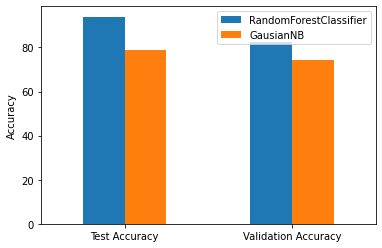

In [372]:
ax = pd.DataFrame([(rf_accuracy*100, gnb_accuracy*100), (rf_val_acc*100, gnb_val_acc*100)], index=['Test Accuracy', 'Validation Accuracy'],columns=["RandomForestClassifier", "GaussianNB"]).plot.bar(rot=0);
ax.set_ylabel("Accuracy");

Comment: the hyperparameters in the RandomForestClassifier in the previous step was changed multiple times to tune and increase the accuracy.

## **Part 5 - Important Features**

In [342]:
imp_list = sorted(zip(X.columns, rf_clf.feature_importances_), key=lambda x: x[1])[::-1]
for key, val in imp_list:
  print(f'{key} : {val}')

MP : 0.6518419507253633
PR : 0.22050904600585547
Quiz : 0.07484724841912309
Stat3 : 0.019433446986200992
Stat0 : 0.016129992319773048
Stat1 : 0.012340619756164203
Stat2 : 0.004897695787520007


So the three most important features in order are: MP (Mini Project), PR (Peer Review) and Quiz.